# CSE 144 Winter 2022 Assignment 1

In this project, the goal is to build a linear regression model to predict the fuel efficiency (MPG) of automobiles from the late 1970s to early 1980s. We'll be using the [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) dataset from UCI Machine Learning Repository.

In [ ]:
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm.notebook import trange

In [ ]:
class DataModule:
    def __init__(self) -> None:
        """
        Inits data module with dataset url and column names. Do not modify.
        """
        self.url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
        self.column_names = [
            "mpg",
            "cylinders",
            "displacement",
            "horsepower",
            "weight",
            "acceleration",
            "model_year",
            "origin",
        ]

    def load_data(self) -> None:
        """
        Load the dataset and drop NaN rows. Do not modify.
        """
        self.dataset = pd.read_csv(
            self.url,
            names=self.column_names,
            na_values="?",
            comment="\t",
            sep=" ",
            skipinitialspace=True,
        ).dropna()

    def bin_feature(self, feature: str, bins: pd.IntervalIndex) -> None:
        """
        Perform binning operation on the column named "feature" in the given
        dataframe, and encode the binned feature into one-hot vectors.

        Args:
            feature: Name of the feature to bin.
            bins: Bin intervals represented by pd.IntervalIndex.
        """
        # ========== YOUR CODE STARTS HERE ==========
        self.dataset[feature] = pd.cut(self.dataset[feature] , bins)
        self.dataset = pd.get_dummies(self.dataset , columns = [feature])

        # ========== YOUR CODE ENDS HERE ==========

    def one_hot_encode(self, features: List[str]) -> None:
        """
        Encode a list of features in a dataframe as one-hot vectors and drop the
        (original) unencoded feature columns.

        Args:
            features: The column names of the features that need to be encoded.
        """
        # ========== YOUR CODE STARTS HERE ==========
        for feature in features:
          bins = self.dataset[feature].unique()
          bins = len(bins)
          #self.dataset[feature] = pd.cut(self.dataset[feature],bins)
          self.dataset = pd.get_dummies(self.dataset,columns = [feature])
          #self.dataset[feature] = pd.get_dummies(self.dataset , columns = [feature])
          #self.dataset.drop(column = feature)
        # ========== YOUR CODE ENDS HERE ==========

    def cross_feature(self, feature_a: str, feature_b: str) -> None:
        """
        Make a new crossed feature by multiplying feature_a and feature_b, and
        name the new feature as "crossed_feature".

        Args:
            feature_a: The column name of feature A.
            feature_b: The column name of feature B.
        """
        # ========== YOUR CODE STARTS HERE ==========
        self.dataset["crossed_feature"] = self.dataset[feature_a]*self.dataset[feature_b]
        # ========== YOUR CODE ENDS HERE ==========

    def normalize(self) -> None:
        """
        Use min-max normalization to normalize the dataset. The equation is provided below.

        d_normalized = (d - min(d)) / (max(d) - min(d))
        """
        # ========== YOUR CODE STARTS HERE ==========
        #for column in self.dataset:
          #max_val = self.dataset[column].max()
          #min_val = self.dataset[column].min()
          #self.dataset[column] = (self.dataset[column] - min_val) / (max_val - min_val)

        max_val = self.dataset.max() 
        min_val = self.dataset.min()
        self.dataset = (self.dataset - min_val) / (max_val - min_val)
        # ========== YOUR CODE ENDS HERE ==========

    def train_val_test_split(
        self, val_size: float = 0.2, test_size: float = 0.5, seed: int = 144
    ) -> Tuple[Tuple[np.ndarray], Tuple[np.ndarray], Tuple[np.ndarray]]:
        """
        Split a dataframe into features and labels for train, validation, and test sets.

        DO NOT modify the default parameters specified above, and make sure to turn on
        shuffling by shuffle=True.

        More specifically, you are supposed to first split 50% of all data into the test
        set, and then the other 50% as the training set. For the training set, you should
        then use the given 80%/20% split as train/validation.

                               |--------|       |--|      |----------|
                               train (156)    val (40)     test (196)

        You should have 156/40/196 examples in train/val/test, respectively. And do not
        forget to split features from labels at the end.

        Args:
            val_size: The proportion of the dataset to include in the validation set.
            It must be a float type.

            test_size: The proportion of the dataset to include in the validation set. It
            must be a float type.

            seed: Controls the shuffling of the dataframe. Do not modify the default seed.

        Returns:
            A tuple containing train, validation, and test features and labels.
        """
        # ========== YOUR CODE STARTS HERE ==========
        self.ydata = self.dataset['mpg'].copy()
        self.xdata = self.dataset.drop(columns = 'mpg')

        x_train , x_test , y_train , y_test = train_test_split(self.xdata , self.ydata , test_size = test_size , random_state = seed , shuffle = True)

        x_train , x_val , y_train , y_val = train_test_split(x_train,y_train, test_size = val_size , random_state = seed , shuffle = True)
        # print('\n----- printing x_train -----\,\,')
        # print(x_train)
        # print('\n----- printing x_test -----\,\,')
        # print(x_test)
        # print('\n----- printing x_val -----\,\,')
        # print(x_val)
        # print('\n\n\n\n\n\n\n\n\n')
        # print(len(x_train))
        # print(len(x_test))
        # print(len(x_val))
        # print('\n\n\n\n\n\n\n\n\n')
        # ========== YOUR CODE ENDS HERE ==========

        return (
            (x_train.to_numpy(), y_train.to_numpy()),
            (x_val.to_numpy(), y_val.to_numpy()),
            (x_test.to_numpy(), y_test.to_numpy()),
        )

In [ ]:
# Create data module
datamodule = DataModule()
datamodule.load_data()
feature_to_bin = "model_year"
features_to_encode = ["cylinders", "origin"]
features_to_cross = ["displacement", "acceleration"]
intervals = pd.IntervalIndex.from_tuples([(69, 74), (74, 79), (79, 84)])

# DO NOT MODIFY ANYTHING ABOVE

# ========== YOUR CODE STARTS HERE ==========
datamodule.bin_feature(feature_to_bin,intervals)
datamodule.one_hot_encode(features_to_encode)
datamodule.cross_feature(features_to_cross[0],features_to_cross[1])
datamodule.normalize()
training_set , validation_set , test_set = datamodule.train_val_test_split()
# ========== YOUR CODE ENDS HERE ==========

In [ ]:
class LinearRegressionTrainer:
    def __init__(
        self, num_features: int, learning_rate: float = 1e-3, num_epochs: int = 5000
    ) -> None:
        """
        Inits the linear regression model.
        """
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_features = num_features
        self.train_loss_history = []
        self.val_loss_history = []
        self.test_loss = None

        # Here the task is to initialize the parameters theta of the linear regression
        # model. The initial parameters should be an NumPy array of zeros.
        # ========== YOUR CODE STARTS HERE ==========
        self.theta = np.zeros((num_features,))
        # self.theta = np.random.normal(size=self.num_features + 1)
        # ========== YOUR CODE ENDS HERE ==========

    # def compute_cost(self,X: np.ndarray,y: np.ndarray):

    #   self.data_size = y.size  # number of training examples
      
    #   J = 0
    
    #   for i in range(self.data_size):
    #     x = X[i,:]
    #     h = self.theta[0] + np.dot(self.theta[1:],x)
    #     J += (h - y[i])**2

    #   J = J*(1/(2*self.data_size))

    #   return J 


    def gradient_descent_step(self, x: np.ndarray, y: np.ndarray) -> None:
        """
        Perform a single step of gradient update on self.theta.
        
        Args:
            x: A matrix of features.
            y: A vector of labels.
        """
        # ========== YOUR CODE STARTS HERE ==========
        self.data_size = y.size
        self.theta = self.theta - (self.learning_rate)*self.mse_loss_derivative(x,y)
        # ========== YOUR CODE ENDS HERE ==========


# ------------------------------------------------------------------------------


    def train(
        self,
        x_train: np.ndarray,
        y_train: np.ndarray,
        x_val: np.ndarray,
        y_val: np.ndarray,
    ) -> None:
        """
        Run gradient descent for n epochs, where n = self.num_epochs. In every epoch,
            1. Calculate the training loss given the current theta, and append it to
               self.train_loss_history.
            2. Calculate the validation loss given the current theta, and append it to
               self.val_loss_history.
            3. Update theta.

        If you wish to use the bias trick, please remember to use it before the for loop.

        Args:
            x: A matrix of features.
            y: A vector of labels.
        """
        # ========== YOUR CODE STARTS HERE ==========


        for N in range(self.num_epochs):

          self.train_loss_history.append(self.mse_loss(np.dot(x_train,self.theta),y_train))
          self.val_loss_history.append(self.mse_loss(np.dot(x_val,self.theta),y_val))
          self.gradient_descent_step(x_train,y_train)

        # ========== YOUR CODE ENDS HERE ==========

    def mse_loss_derivative(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Calculate the derivative of the loss function w.r.t. theta.

        Args:
            x: A matrix of features.
            y: A vector of labels.

        Returns:
            A vector with the same dimension as theta, where each element is the
            partial derivative of the loss function w.r.t. the corresponding element
            in theta.
        """
        # ========== YOUR CODE STARTS HERE ==========
        #h = self.theta[0] + np.dot(self.theta[1:],x)

        LD = np.dot(x,self.theta) - y

        return np.dot(x.T,LD);
        # ========== YOUR CODE ENDS HERE ==========

    def evaluate(self, x_test: np.ndarray, y_test: np.ndarray) -> None:
        """
        Evaluate the model on test set and store the test loss int self.test_loss. This
        should be similar to step 1 and 2 in train().

        If you used the bias trick in train(), you have to also use it here.

        Args:
            x_test: A matrix of features.
            y_test: A vector of labels.
        """
        # ========== YOUR CODE STARTS HERE ==========
        
        self.test_loss = self.mse_loss(np.dot(x_test,self.theta),y_test)
     
        # ========== YOUR CODE ENDS HERE ==========

    def mse_loss(self,pred: np.ndarray, target: np.ndarray) -> float:
        """
        Calculate the mean squared error given prediction and target. The equation is
        given below.

        mse = sum((pred - target) ^ 2) / (2 * n)

        Args:
            pred: A vector of predictions.
            target: A vector of labels.

        Returns:
            Mean squared error between each element in pred and target.
        """
        assert pred.shape == target.shape
        # ========== YOUR CODE STARTS HERE ==========
        #mse = np.sum(np.square(pred - target)) / (2 * pred.size)
        mse = np.sum(np.square(pred - target)) / (2 * pred.size)
        return mse
        # ========== YOUR CODE ENDS HERE ==========

Final train loss: 0.003134024762898423
Final validation loss: 0.0025989983388619705
[ 0.45623676 -0.31455578 -0.44512625  0.2331801   0.10638585  0.17450682
  0.31785502  0.0143469   0.16135998  0.16050856  0.10325332  0.15927894
  0.15591906  0.21486643  0.22796221 -0.30256499]


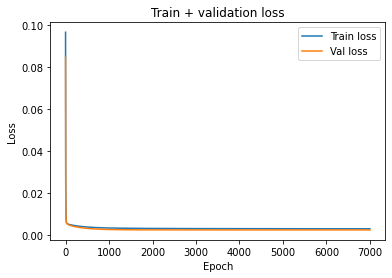

Test loss: 0.0033495420258675317


In [ ]:
# Train a linear regression trainer
# ========== YOUR CODE STARTS HERE ==========
num_features = test_set[0].shape[1]
trainer = LinearRegressionTrainer(num_features,num_epochs = 7000,learning_rate=.001)
trainer.train(training_set[0],training_set[1],validation_set[0],validation_set[1])
#print(trainer.train_loss_history)
#print(trainer.val_loss_history)
# ========== YOUR CODE ENDS HERE ==========

# DO NOT MODIFY ANYTHING BELOW

print(f"Final train loss: {trainer.train_loss_history[-1]}")
print(f"Final validation loss: {trainer.val_loss_history[-1]}")
print(trainer.theta)

plt.plot(np.arange(trainer.num_epochs), trainer.train_loss_history, label="Train loss")
plt.plot(np.arange(trainer.num_epochs), trainer.val_loss_history, label="Val loss")
plt.title("Train + validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Use the below lines only after tuning hyperparameters
# ========== YOUR CODE STARTS HERE ==========
trainer.evaluate(test_set[0],test_set[1])
# ========== YOUR CODE ENDS HERE ==========
print(f"Test loss: {trainer.test_loss}")